In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.regularizers import l2,l1_l2
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import keras.preprocessing.image as image
from tensorflow.keras.applications import VGG16

plt.style.use('ggplot')


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2, horizontal_flip=True,vertical_flip=True,
                                   fill_mode="nearest", rotation_range=10,brightness_range=[0.8,1.2],width_shift_range=0.1, height_shift_range=0.1)
validation_datagen = ImageDataGenerator(rescale=1./255)
direc='C:\\Users\\HP\\.vscode\\Python\\AI\\ML Projects\\Datasets\\Apple\\'
Train=train_datagen.flow_from_directory(direc+'train',target_size=(64,64),batch_size=32,class_mode='binary')
Validate=validation_datagen.flow_from_directory(direc+'valid',target_size=(64,64),batch_size=32,class_mode='binary')

Found 4024 images belonging to 2 classes.
Found 1006 images belonging to 2 classes.


In [5]:

# Load the pre-trained VGG16 model
vgg_model = VGG16(input_shape=(64, 64, 3), include_top=False, weights='imagenet')

# Freezing some layers so that there weights won't be updated
for layer in vgg_model.layers:
    layer.trainable = False
for layer in vgg_model.layers[-4:]:
    layer.trainable = True

# Check which layers are trainable
for layer in vgg_model.layers:
    print(layer, layer.trainable)

# Create a custom classification head
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

<keras.src.engine.input_layer.InputLayer object at 0x000001B7F4B2AC70> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001B7F4D4A160> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001B7F4877790> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B7F3CF6730> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001B7F48775B0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001B7F5DC2340> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B7F5DC2550> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001B7F4D4AC10> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001B7F5DD3160> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001B7F5DCD760> False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000001B7F5DE20A0> False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x000001B7F5DD3D30> False


In [6]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001, verbose=1)
checkpoint=ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',save_best_only=True,verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [7]:
history1=model.fit(x=Train,validation_data=Validate,epochs=10,callbacks=[early_stopping,checkpoint,reduce_lr],verbose=1)

Epoch 1/10
126/126 [==============================] - ETA: 0s - loss: 0.2325 - accuracy: 0.9033
Epoch 1: val_loss improved from inf to 0.07442, saving model to best_model.h5


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


126/126 [==============================] - 107s 840ms/step - loss: 0.2325 - accuracy: 0.9033 - val_loss: 0.0744 - val_accuracy: 0.9761 - lr: 1.0000e-04
Epoch 2/10
126/126 [==============================] - ETA: 0s - loss: 0.1124 - accuracy: 0.9555
Epoch 2: val_loss did not improve from 0.07442
126/126 [==============================] - 111s 874ms/step - loss: 0.1124 - accuracy: 0.9555 - val_loss: 0.1397 - val_accuracy: 0.9483 - lr: 1.0000e-04
Epoch 3/10
126/126 [==============================] - ETA: 0s - loss: 0.1096 - accuracy: 0.9543
Epoch 3: val_loss improved from 0.07442 to 0.05505, saving model to best_model.h5
126/126 [==============================] - 116s 917ms/step - loss: 0.1096 - accuracy: 0.9543 - val_loss: 0.0551 - val_accuracy: 0.9742 - lr: 1.0000e-04
Epoch 4/10
126/126 [==============================] - ETA: 0s - loss: 0.0851 - accuracy: 0.9677
Epoch 4: val_loss did not improve from 0.05505
126/126 [==============================] - 110s 877ms/step - loss: 0.0851 - accu

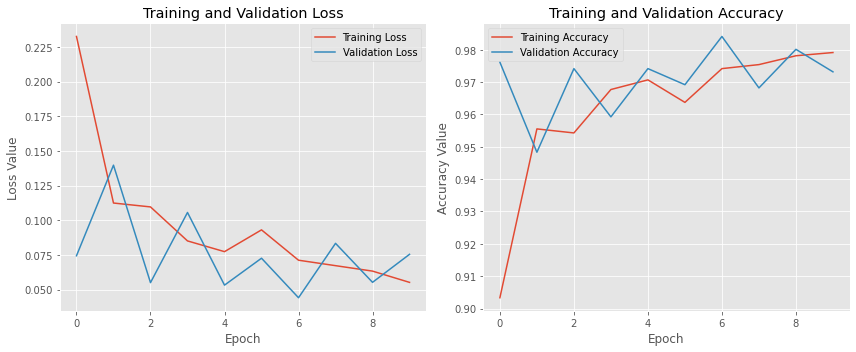

In [8]:
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']

# If you have also set metrics=['accuracy'] in the model compilation step
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

plt.figure(figsize=(12, 5))

# Plotting loss & accuracy
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()

plt.tight_layout()
plt.savefig('loss_acc VGG16.png')
plt.show()


In [9]:
def result(path,model):
    test_data= image.load_img(path, target_size=(64,64))
    test_data= image.img_to_array(test_data)
    test_data= np.expand_dims(test_data, axis=0)
    # return "Dog" if model.predict(test_data)[0]==1 else "Cat"
    return model.predict(test_data)

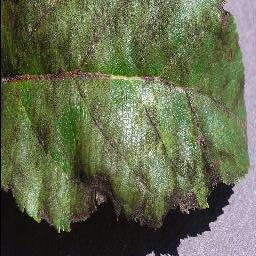

In [19]:
image.load_img('C:\\Users\HP\\.vscode\\Python\\AI\\ML Projects\\Datasets\\Apple\\test\\AppleScab1.jpg')

In [20]:
result('C:\\Users\HP\\.vscode\\Python\\AI\\ML Projects\\Datasets\\Apple\\test\\AppleScab1.jpg',model)

1/1 [==============================] - 0s 64ms/step


array([[0.]], dtype=float32)

In [12]:
Train.class_indices

{'Apple___Apple_scab': 0, 'Apple___healthy': 1}

In [23]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpb_yjl9jt\assets


INFO:tensorflow:Assets written to: C:\Users\HP\AppData\Local\Temp\tmpb_yjl9jt\assets
